<a href="https://colab.research.google.com/github/JayYongjaeKim/MoLab/blob/main/%EC%98%81%EA%B5%AD%EC%8B%9C%EC%9E%A5%EC%9D%98_%EC%A4%91%EA%B3%A0_%EC%9E%90%EB%8F%99%EC%B0%A8_%EA%B0%80%EA%B2%A9_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EB%A3%A8%EA%B8%B0%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 임포트

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving brand.csv to brand.csv
Saving cars.csv to cars.csv


In [ ]:
import pandas as pd

car = pd.read_csv('cars.csv')
brand = pd.read_csv('brand.csv')

# 2. 데이터 확인

In [ ]:
car.head(5)

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [ ]:
brand.head(10) # brand.head(100)

,country,brand
0,Czech Republic,skoda
1,United Kingdom,vauxhall
2,South Korea,hyundai
3,United Kingdom,mini
4,United States,vauxhall
5,Sweden,hyundai
6,France,ford
7,Germany,vauxhall
8,France,volvo
9,Germany,peugeot


In [ ]:
print(car.isna().sum()) # brand.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
dtype: int64


# 3. 데이터 클렌징
> - 컬럼 이름 수정 및 데이터 표준화
>> - car.csv의 title > name으로 변경
>> - name 컬럼의 모든값과 brand 데이터 소문자 변환
> - 브랜드 이름 기준 데이터 결합
>> - split사용하여 name(title)기준 결합
> - 결측치 처리 (1차 2개 이상 결측치 제거, 2차 unknown 및 최빈값)
>> - Previous Owners 및 Service history : Unknown
>> - Engine, Doors, Seats, Emission Class : 최빈값
> - 중복데이터 확인
>> - 존재한다면 중복데이터 처리
> - 데이터 형태 변환
>> - 카테고리 변수 변환
>> - 수치형 변수 표준화 및 정규화

In [ ]:
# 컬럼 이름 수정 및 데이터 표준화
car.rename(columns={'title' :  'name'}, inplace = True)
brand.rename(columns={'title' :  'name'}, inplace = True)
car['name'] = car['name'].str.lower()
brand['name'] = car['name'].str.lower()

In [ ]:
car.head(5) # brand.head(5)

,name,country
0,skoda fabia,Czech Republic
1,vauxhall corsa,United Kingdom
2,hyundai i30,South Korea
3,mini hatch,United Kingdom
4,vauxhall corsa,United States


In [ ]:
#브랜드 이름 기준 데이터 결합
merged_data = car.merge(brand, on='name', how='left')
merged_data.head(5)

,name,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,skoda fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Germany
2,skoda fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Romania
3,vauxhall corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
4,vauxhall corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United States


In [ ]:
#결측치 처리 1차 : 2개이상 결측치 보유시 제거
limit = 2

cleaned_data = merged_data.dropna(thresh=len(merged_data.columns) - limit)

print(cleaned_data.isnull().sum())

name                    0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      2173
Fuel type               0
Body type               0
Engine                  0
Gearbox                 0
Doors                   0
Seats                   2
Emission Class          4
Service history      5257
country              1499
dtype: int64


In [ ]:
#중복 데이터 확인 및 처리
print(car.duplicated().sum())
print(brand.duplicated().sum())
print(cleaned_data.duplicated().sum())

#중복 데이터가 늘어 났다면 merge 과정에서 name이 car의 한 컬럼에 brand의 여러컬럼이 붙었다 판단(다시 시작)

828
6
2331


In [ ]:
print(car['name'].nunique())
print(brand['name'].nunique())
#name split 필요

455
23


In [ ]:
print(brand['brand'].unique())
brand
#애초에 한 name에 여러 국가가 붙어 merge시 중복행이 많이 발생할 수밖에 없었음 (중복제거 시작)

['skoda' 'vauxhall' 'hyundai' 'mini' 'ford' 'volvo' 'peugeot' 'bmw'
 'citroen' 'mercedes-benz' 'mazda' 'saab' 'volkswagen']


In [ ]:
brand = brand.drop('name', axis = 1)
#깔끔하게 name 삭제하고 brand로 통일

In [ ]:
##위 과정의 오류 확인으로 브랜드별 국가 선택 필요 > 브랜드별 최빈 국가를 그 브랜드의 국가로 지정(feat.  결과가 엉망....)
brand_unique = brand.groupby('brand').agg({'country': lambda x: x.mode()[0]}).reset_index()

#위 과정 결과 엉망으로 수작업 진행(replace 사용)
brand_unique['country'] = brand_unique['brand'].replace({
    'bmw': 'Germany',
    'citroen': 'France',
    'ford': 'United States',
    'hyundai': 'South Korea',
    'mazda': 'Japan',
    'mercedes-benz': 'Germany',
    'mini': 'United Kingdom',
    'peugeot': 'France',
    'saab': 'Sweden',
    'skoda': 'Czech Republic',
    'vauxhall': 'United Kingdom',
    'volkswagen': 'Germany',
    'volvo': 'Sweden'
})
brand_unique

,brand,country
0,bmw,Germany
1,citroen,France
2,ford,United States
3,hyundai,South Korea
4,mazda,Japan
5,mercedes-benz,Germany
6,mini,United Kingdom
7,peugeot,France
8,saab,Sweden
9,skoda,Czech Republic


In [ ]:
car['brand'] = car['name'].str.split(' ').str[0]

merged_data2 = car.merge(brand_unique, on='brand', how='left')
merged_data2.head(5)

,name,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,skoda fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,Czech Republic
1,vauxhall corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,South Korea
3,mini hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,vauxhall corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,United Kingdom


In [ ]:
limit = 2

cleaned_data2 = merged_data2.dropna(thresh=len(merged_data2.columns) - limit)

print(cleaned_data2.isnull().sum())

name                    0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners       901
Fuel type               0
Body type               0
Engine                  1
Gearbox                 0
Doors                   0
Seats                   4
Emission Class          5
Service history      2614
brand                   0
country               811
dtype: int64


In [ ]:
#결측치 처리 > Previous Owners 및 Service history : Unknown
import numpy as np

cleaned_data2['Service history'] = cleaned_data2['Service history'].fillna('Unknown')
cleaned_data2['Previous Owners'] = cleaned_data2['Previous Owners'].fillna('Unknown')
cleaned_data2['country'] = cleaned_data2['country'].fillna('Unknown')

unknown = cleaned_data2[(cleaned_data2['Previous Owners'] == 'Unknown') | (cleaned_data2['Service history']== 'Unknown') | (cleaned_data2['country']== 'Unknown')]
print(cleaned_data2.isnull().sum())

name                 0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               1
Gearbox              0
Doors                0
Seats                4
Emission Class       5
Service history      0
brand                0
country              0
dtype: int64


<ipython-input-90-cd30c2034dfc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data2['Service history'] = cleaned_data2['Service history'].fillna('Unknown')
<ipython-input-90-cd30c2034dfc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data2['Previous Owners'] = cleaned_data2['Previous Owners'].fillna('Unknown')
<ipython-input-90-cd30c2034dfc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [ ]:
cleaned_data2['Emission Class'].fillna(cleaned_data2['Emission Class'].mode()[0], inplace=True)
#cleaned_data2['Seats'].fillna(cleaned_data2.groupby('Body type')['Seats'].transform(lambda x: x.mode()[0]), inplace=True) >> 오류 발생 groupby 절로 인해 다른 행에도 영향이가 null 값 대폭 증가  > drop리로 방법 전환
cleaned_data2['Engine'].fillna(cleaned_data2['Engine'].mode()[0], inplace=True)


<ipython-input-91-07112d9e5858>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data2['Emission Class'].fillna(cleaned_data2['Emission Class'].mode()[0], inplace=True)
<ipython-input-91-07112d9e5858>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data2['Emission Class'].fillna(cleaned_data2['Emission Class'].mode()[0], inpla

In [ ]:
cleaned_data2 = cleaned_data2.dropna(subset=['Seats'])
print(cleaned_data2.isnull().sum())

name                 0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
brand                0
country              0
dtype: int64


In [ ]:
print(cleaned_data2.duplicated().sum())

635


In [ ]:
cleaned_data2 = cleaned_data2.drop_duplicates()
print(cleaned_data2.duplicated().sum())

0


In [ ]:
cleaned_data2 = cleaned_data2.drop('brand', axis=1)
cleaned_data2.head(10)

,name,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Czech Republic
1,vauxhall corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,hyundai i30,949,137000,2011,Unknown,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,South Korea
3,mini hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,vauxhall corsa,1000,85000,2013,Unknown,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,United Kingdom
5,hyundai coupe,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,Unknown,South Korea
6,ford focus,798,140599,2008,Unknown,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,Unknown,United States
7,vauxhall corsa,1995,90000,2009,Unknown,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Unknown,United Kingdom
9,peugeot 207,1299,87000,2008,5.0,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,Unknown,France
10,ford fiesta,1495,181693,2009,Unknown,Diesel,Hatchback,1.6L,Manual,3.0,5.0,Euro 4,Full,United States


In [ ]:
#데이터 형태 변환
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
cleaned_data2['Emission Class'] = encoder.fit_transform(cleaned_data2['Emission Class'].astype(str))

cleaned_data2 = pd.get_dummies(cleaned_data2, columns=['Fuel type', 'Body type', 'Gearbox'], drop_first=True)

cleaned_data2['Engine'] = cleaned_data2['Engine'].str.replace('L', '').astype(float)

In [ ]:
cleaned_data2.head(10)

,name,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Service history,...,Fuel type_Petrol Plug-in Hybrid,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual
0,skoda fabia,6900,70189,2016,3.0,1.4,5.0,5.0,5,Unknown,...,False,False,False,False,True,False,False,False,False,True
1,vauxhall corsa,1495,88585,2008,4.0,1.2,3.0,5.0,3,Full,...,False,False,False,False,True,False,False,False,False,True
2,hyundai i30,949,137000,2011,Unknown,1.4,5.0,5.0,4,Unknown,...,False,False,False,False,True,False,False,False,False,True
3,mini hatch,2395,96731,2010,5.0,1.4,3.0,4.0,3,Full,...,False,False,False,False,True,False,False,False,False,True
4,vauxhall corsa,1000,85000,2013,Unknown,1.3,5.0,5.0,4,Unknown,...,False,False,False,False,True,False,False,False,False,True
5,hyundai coupe,800,124196,2007,3.0,2.0,3.0,4.0,3,Unknown,...,False,False,True,False,False,False,False,False,False,True
6,ford focus,798,140599,2008,Unknown,1.6,5.0,5.0,3,Unknown,...,False,False,False,False,True,False,False,False,False,True
7,vauxhall corsa,1995,90000,2009,Unknown,1.2,3.0,5.0,3,Unknown,...,False,False,False,False,True,False,False,False,False,True
9,peugeot 207,1299,87000,2008,5.0,1.6,5.0,5.0,3,Unknown,...,False,False,False,False,True,False,False,False,False,True
10,ford fiesta,1495,181693,2009,Unknown,1.6,3.0,5.0,3,Full,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
cleaned_data2['Emission Class'] = cleaned_data2['Emission Class'].astype(int)

# 4. 데이터 분석
> - 4-1. 주성분 분석
> - 4-2. 상관관계 분석
> - 4-3. 가격예측 머신러닝(w. 상관관계 결과)

In [ ]:
#주성분 분석
from sklearn.preprocessing import StandardScaler   #우선 클린드데이터 중 수치데이터(float, int) 표준화

number_data = cleaned_data2.select_dtypes(include=[float, int])
scaler = StandardScaler()

scaled_data = scaler.fit_transform(number_data)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.7)

pca_data = pca.fit_transform(scaled_data)

print("선택 주성분 개수 :", pca.n_components_)
print("분산 비율 : ", pca.explained_variance_ratio_)
print("누적 분산 비율  : ", pca.explained_variance_ratio_.cumsum())

#결과 : 3개의 주성분으로도 충분히 데이터의 특성 표현을 잘 한다.

선택 주성분 개수 : 3
분산 비율 :  [0.42201831 0.21627747 0.15064025]
누적 분산 비율  :  [0.42201831 0.63829578 0.78893603]


In [ ]:
pd.DataFrame(pca_data)

,0,1,2
0,1.775201,0.382086,-0.174455
1,-1.459157,-0.639997,-1.121415
2,-0.707812,0.956828,-0.494513
3,-1.388490,-1.814204,-0.642933
4,0.027861,0.654956,-1.000300
...,...,...,...
2506,-1.274594,0.823953,-0.531643
2507,-1.441236,0.695485,-0.834872
2508,-0.549972,0.255674,0.969989
2509,-2.451608,1.301657,0.958626


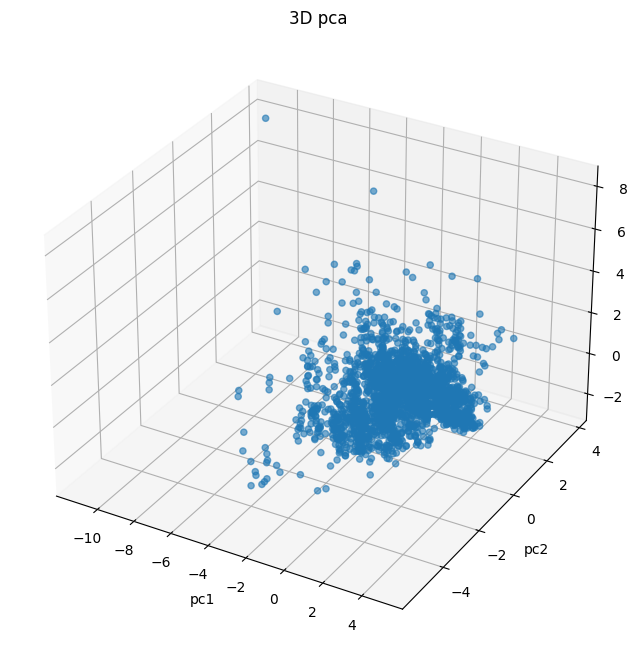

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.6)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.title('3D pca')
plt.show()

###[상관관계 결과]
- Price와 Registration_Year간의 상관계수가 0.75로 높은 상관관계를 보이며 이는 등록일이 최근일수록 가격이 높아진다는 것을 나타냄
- Price와 Mileage는 -0.46의 음의 상관관계를 가지며 주행거리가 길수록 가격이 낮아짐을 나타냄
- Price와 Prevuious Owners는 -0.42의 음의 상관관계를 가지며 오너를 많이 거친 차량일수록 가격이 낮아짐을 나타냄
- Registration_Year와 Mileage는 -0.39의 음의 상관관계를 가지며 차량연도가 최근일수록 주행거리가 짧음을 나타냄
- Registration_Year와 Previous Owners는 -0.46의 음의 상관관계를 가지며 차량연도가 최근일수록 거친 오너가 적다는 것을 나타냄
- Doors와 Searts는 0.53의 양의 상관관계를 가지며 문이 많으면 좌석이 많다는 것을 나타냄
- Engine는 다른 요소들과의 상관관계가 나타나지 않은 독립적인 변수로 보임

`상관관계 분석을 바탕으로 가격 예측모델링에 Registration_Year와 Mileage, Previous Owners를 사용하면 좋을 것을 확인`

<ipython-input-121-9ccbafefbd1f>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_data2 = cleaned_data2.replace('Unknown', np.nan)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/cor

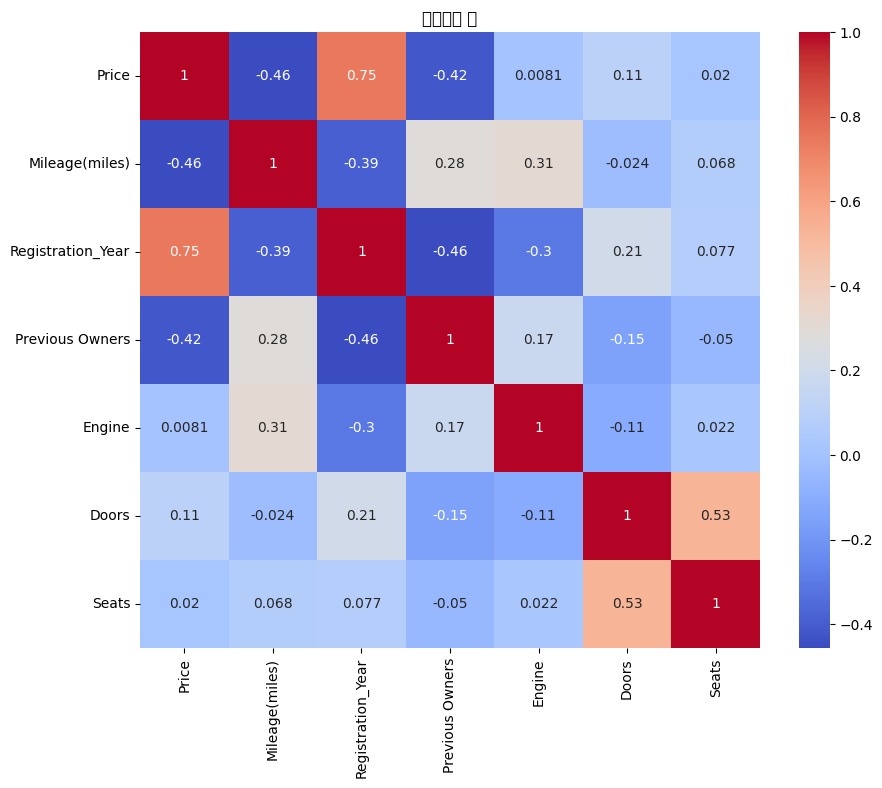

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_data2 = cleaned_data2.replace('Unknown', np.nan)

numeric_col = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Engine', 'Doors', 'Seats']


plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_data2[numeric_col].corr(), annot=True, cmap='coolwarm')
plt.title("상관관계 표")
plt.show()

In [ ]:
#상관관계 결과를 바탕으로한 머신러닝(선형회귀활용)진행

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


features = ['Mileage(miles)', 'Registration_Year', 'Previous Owners']
data3 = cleaned_data2[features + ['Price']].dropna()

X = data3[features]
Y = data3['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

print(r2_score(Y_test, pred))

#0.6의 낮은 성능(?) 을 보여 전처리 하이퍼파라미터 튜닝이 필요

0.6256199864018087
